# Drill - Data Analysis

Analysis of the spectral data obtained for samples of the drill at Mina do Barroso.
...........
.......

In [1]:
%matplotlib notebook
from core.experiment import *

# Data table with samples and concentrations

In [2]:
root_path = "C:/Users/Miguel/Desktop/Furo SciAps/Converted1/"
concentration_data = pd.read_csv(root_path+"Furo.csv",sep=";")
concentration_data.set_index("Sample ID", inplace=True)
concentration_data2 = concentration_data['Chemistry'].groupby('Sample ID').first()
concentration_data1 = concentration_data.groupby('Sample ID').mean()

concentration_data3 = pd.concat([concentration_data1, concentration_data2], axis=1, join='outer', sort=True)
concentration_data3.head(len(concentration_data))

,H,He,Li,Be,B,C,N,O,F,Ne,...,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og,Li2O,Chemistry
Sample ID,,,,,,,,,,,,,,,,,,,,,
DRI0000001,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
DRI0000002,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
DRI0000003,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
DRI0000004,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
DRI0000005,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DRI0000125,0,0,11000,108.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FGP
DRI0000126,0,0,1860,209.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FGP
DRI0000127,0,0,4280,160.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FGP


## Load the data from folder

In [7]:
sample_index = 128
root_path = "C:/Users/Miguel/Desktop/Furo SciAps/Converted1/"

sample_folders = [f for f in os.listdir(root_path) if os.path.isdir(root_path + f)]

list_of_experiments = []
sample_ids = []
for i in range(0,len(sample_folders)):
    sample_f = sample_folders[i]
    print(" Reading Folder "+ sample_f + " - "+ str(i+1) + " of " + str(len(sample_folders)), end="\r")
    
    sample_folder = root_path + sample_f +"/"
    current_experiment = experiment(sample_folder,Specialtype="SciAps")
    sg = current_experiment.mean_signal
    list_of_experiments.append(current_experiment)
    sample_ids.append(sample_f)

# PCA Analysis of the mean signal

['nan' 'nan' 'nan' 'nan' 'nan' ' SCH' ' SCH' ' SCH' ' SCH' ' SCH'
 ' SCH+FGP' ' SCH+FGP' ' FGP+VQZ' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' SCH+FGP' ' SCH+FGP'
 ' FGP' ' FGP' ' SCH+FGP' ' SCH' ' SCH' ' SCH' ' SCH' ' SCH' ' SCH+FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' SCH+FGP' ' SCH+FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP']
[6.07206590e-01 1.24838038e-01 4.31884369e-02 2.36185723e-02
 1.39853070e-02 1.01103301e-02 8.82581006e-03 7.43589998e-03
 6.87949958e-03 5.75054113e-03 5.41212316e-03 4.93080358e-03
 4.44234146e-03 3.99583919e-03 3.79801571e-03 3.57812329e-03
 3.25072778e-03 3.11370570e-03 2.99464472e-03 2.94414745e-03
 2.74863313e-03 2.68702257e-03 2.62872401e-03 2.59747143e-03
 2.58744252e-03 2.46158004e-03 2.45897901e-03 2.44142329e-03


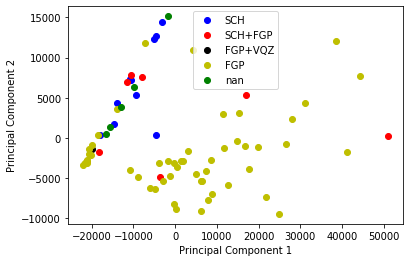

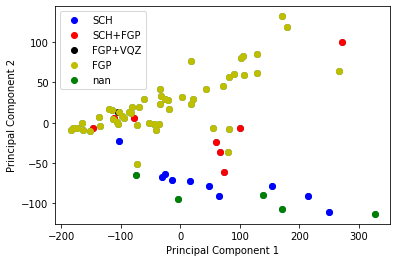

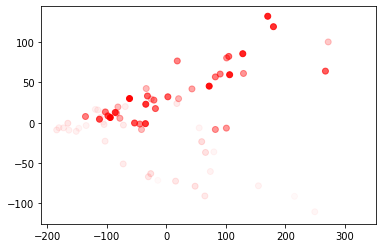

In [32]:
from sklearn import *
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.tree import *



ncomps = 76

end = 76

pca_model = decomposition.PCA(n_components=ncomps,svd_solver="full")
list_mean_signals = np.array([current_experiment.mean_signal.spectrum[0].flatten() for current_experiment in list_of_experiments[:end]])

pca_model.fit(list_mean_signals)

x = pca_model.transform(list_mean_signals)

chemistry_labels=[]
for i in range(0,len(sample_ids[:end])):
    chemistry_label = concentration_data3.loc[" "+str(sample_ids[i]),'Chemistry']
    chemistry_labels.append(chemistry_label)

chemistry_labels=np.array(chemistry_labels)
print(chemistry_labels)
index1 = where(chemistry_labels == ' SCH')[0]
index2 = where(chemistry_labels == ' SCH+FGP')[0]
index3 = where(chemistry_labels == ' FGP+VQZ')[0]
index4 = where(chemistry_labels == ' FGP')[0]
index5 = where(chemistry_labels == 'nan')[0]

c1= 0
c2= 1
c3= 2


subplots()

plot(x[index1,c1],x[index1,c2],'o',color='b',label='SCH')
plot(x[index2,c1],x[index2,c2],'o',color='r',label='SCH+FGP')
plot(x[index3,c1],x[index3,c2],'o',color='k',label='FGP+VQZ')
plot(x[index4,c1],x[index4,c2],'o',color='y',label='FGP')
plot(x[index5,c1],x[index5,c2],'o',color='g',label='nan')
xlabel("Principal Component 1")
ylabel("Principal Component 2")
legend()

for i in range(0,10):
    list_mean_signals = array(list_mean_signals)-np.mean(array(list_mean_signals),axis=0)
    
scaler = StandardScaler()
scaler.fit(list_mean_signals)
list_mean_signals = scaler.transform(list_mean_signals)

pca_model.fit(list_mean_signals)
print(pca_model.explained_variance_ratio_)
x = pca_model.transform(list_mean_signals)
subplots()
chemistry_labels=[]
for i in range(0,len(sample_ids[:end])):
    chemistry_label = concentration_data3.loc[" "+str(sample_ids[i]),'Chemistry']
    chemistry_labels.append(chemistry_label)

chemistry_labels=np.array(chemistry_labels)
print(chemistry_labels)
index1 = where(chemistry_labels == ' SCH')[0]
index2 = where(chemistry_labels == ' SCH+FGP')[0]
index3 = where(chemistry_labels == ' FGP+VQZ')[0]
index4 = where(chemistry_labels == ' FGP')[0]
index5 = where(chemistry_labels == 'nan')[0]

c1= 0
c2= 1
c3= 2
plot(x[:,c1],x[:,c2],'o')

plot(x[index1,c1],x[index1,c2],'o',color='b',label='SCH')
plot(x[index2,c1],x[index2,c2],'o',color='r',label='SCH+FGP')
plot(x[index3,c1],x[index3,c2],'o',color='k',label='FGP+VQZ')
plot(x[index4,c1],x[index4,c2],'o',color='y',label='FGP')
plot(x[index5,c1],x[index5,c2],'o',color='g',label='nan')
xlabel("Principal Component 1")
ylabel("Principal Component 2")
legend()

subplots()
targets = []
for i in range(0,len(sample_ids[:end])):
    target = concentration_data3.loc[" "+str(sample_ids[i]),'Li']
    targets.append(target)
targets = np.array(targets)

oo = np.ones(targets.shape)
alphas = zip(oo,0*oo,0*oo,targets/max(targets))
alphas = list(map(list, alphas))
print(alphas)

scatter(x[:,c1],x[:,c2],color=alphas)



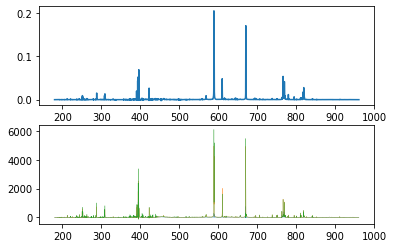

In [33]:
pca_model = decomposition.PCA(n_components=76,)
list_mean_signals = np.array([current_experiment.mean_signal.spectrum[0].flatten() for current_experiment in list_of_experiments[:end]])

pca_model.fit(list_mean_signals)

x = pca_model.transform(list_mean_signals)

subplots()
subplot(211)
plot(list_of_experiments[0].mean_signal.wavelengths[0],pca_model.components_[0])
ind=17
ind1=40
ind2=50
subplot(212)
plot(list_of_experiments[ind].mean_signal.wavelengths[0],list_of_experiments[ind].mean_signal.spectrum[0],lw=0.3)
plot(list_of_experiments[ind1].mean_signal.wavelengths[0],list_of_experiments[ind1].mean_signal.spectrum[0],lw=0.3)
plot(list_of_experiments[ind2].mean_signal.wavelengths[0],list_of_experiments[ind2].mean_signal.spectrum[0],lw=0.3)

# PLS regression for Lithium - mean signal

0.40277309482599577
0.11919475175615135


(PLSRegression(copy=True, max_iter=500, n_components=10, scale=False, tol=1e-06),
 0.11919475175615135,
 4999780.891000177,
 4648446.296003405)

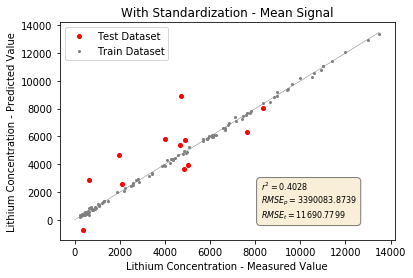

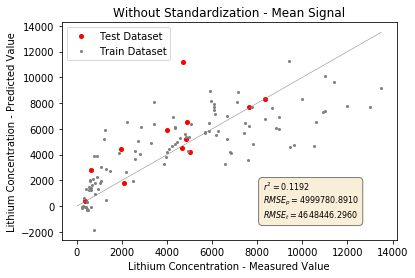

In [34]:
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.tree import *

ts = 0.1
rs = 0
ncomp = 10
sigm=1.

def SNV_transform(list_signals):
    new_list=[]
    for i in range(0,len(list_signals)):
        new_list.append((list_signals[i]-np.mean(list_signals[i]))/sigm)
    return new_list

def normalize_transform(list_signals):
    new_list=[]
    for i in range(0,len(list_signals)):
        new_list.append(list_signals[i]/np.sum(list_signals[i]))
    return new_list
    
targets = []
for i in range(0,len(sample_ids)):
    target = concentration_data3.loc[" "+str(sample_ids[i]),'Li']
    targets.append(target)
targets = np.array(targets)

def pls_concentration(list_of_experiments, targets,test_size=0.2,random_seed=0, ncomponents=5,
                      Plot=True, Title='PLS Regression', label_x='Measured value', label_y='Predicted value', scaler = False):
    """
    Returns a pls model and plot the result of a Partial Least squares regression
    of the mean stiched spectrums for each experiment in the list_of_experiements 
    to a target concentration given in the targets array.
    
    """
    #pls_model = cross_decomposition.PLSRegression(n_components = ncomponents, scale = scaler)
    #pls_model = svm.SVR(kernel='poly', gamma='auto',coef0 = 1)
    pls_model = cross_decomposition.PLSRegression(n_components = ncomponents, scale = False)
    #pls_model = cross_decomposition.PLSCanonical(n_components = ncomponents, algorithm='svd')
    #pls_model = neighbors.KNeighborsRegressor(n_neighbors=2)
    #pls_model = neural_network.MLPRegressor()
    #pls_model = ElasticNet()
    #list_of_experiments=[current_experiment.mean_signal.remove_baseline() for current_experiment in list_of_experiments]
    #print([current_experiment.mean_signal.density_H_alpha(Plot=False)[0] for current_experiment in list_of_experiments])
    list_mean_signals = np.array([current_experiment.mean_signal.spectrum[0].flatten() for current_experiment in list_of_experiments])
    #list_mean_signals = normalize_transform(list_mean_signals)
    
    """
    list_mean_signals = []
    new_targets = []
    for i in range(0,len(list_of_experiments)):
        temp_list = []
        for j in range(0,len(list_of_experiments[i].list_of_signals)):
            list_mean_signals.append(np.array(list_of_experiments[i].list_of_signals[j].spectrum).flatten())
            new_targets.append(targets[i])
        
    list_mean_signals = np.array(list_mean_signals)
    print(list_mean_signals)
    print(list_mean_signals.shape)
    new_targets = np.array(new_targets)
    print(new_targets.shape)
    """
    if scaler:
        #print(list_mean_signals)
        scaler = StandardScaler()
        #scaler = MinMaxScaler()
        #scaler = Normalizer()
        #scaler = RobustScaler()
        scaler.fit(list_mean_signals)
        #list_mean_signals = scale(list_mean_signals,axis=1)
        list_mean_signals = scaler.transform(list_mean_signals)
        #print(list_mean_signals)
    """
    #subplots()
    #plot(list_mean_signals[:,3],'o')
    """
    
    X_train, X_test, y_train, y_test = train_test_split(list_mean_signals, targets, 
                                                        test_size=test_size, random_state=random_seed)
    
    #X_train, X_test, y_train, y_test = train_test_split(list_mean_signals, new_targets, 
     #                                                   test_size=test_size, random_state=random_seed)
    pls_model.fit(X_train,y_train)
    r2=pls_model.score(X_test, y_test) 
    RMSE_p = mean_squared_error(y_test,pls_model.predict(X_test))#,squared = False)
    RMSE_t = mean_squared_error(y_train,pls_model.predict(X_train))#,squared = False)
    if Plot:
        subplots()

        ###With baseline
        #subplot(121)
        title(Title)

        ax = gca()
        ax.text(0.6, 0.1,  '$r^2 =$' + "%0.4f" % r2 + '\n'
                +'$RMSE_p =$' + "%0.4f" % RMSE_p + '\n'
                +'$RMSE_t =$' + "%0.4f" % RMSE_t ,
                        transform=ax.transAxes,fontsize=8, bbox={'boxstyle':'round', 'facecolor': 'wheat', 'alpha': 0.5, 'pad': 0.5})

        print(r2)
        predicted = pls_model.predict(X_test)
        predicted_train = pls_model.predict(X_train)
        plot(y_test,predicted,'o',color = 'r', markersize=4,label = 'Test Dataset')
        plot(y_train,predicted_train,'o',color = 'grey', markersize=2, label = 'Train Dataset')

        mm=max([max(targets),max(predicted)])
        xyline =np.linspace(0,mm,5) 
        plot(xyline,xyline,'-',color = 'grey', lw=0.5)
        xlabel(label_x)
        ylabel(label_y)
        legend()
    
    return pls_model, r2, RMSE_p, RMSE_t

init = 5
rs=10

pls_concentration(list_of_experiments[init:], targets[init:],test_size=ts,random_seed=rs, ncomponents=ncomp,
                      Plot=True, Title='With Standardization - Mean Signal', 
                  label_x='Lithium Concentration - Measured Value', label_y='Lithium Concentration - Predicted Value',
                 scaler=True)

pls_concentration(list_of_experiments[init:], targets[init:],test_size=ts,random_seed=rs, ncomponents=ncomp,
                      Plot=True, Title='Without Standardization - Mean Signal', 
                  label_x='Lithium Concentration - Measured Value', label_y='Lithium Concentration - Predicted Value',
                 scaler=False)


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def pls_crossval_score(list_of_experiments, targets,test_size=0.2,random_seed=0, 
                    nsplits = 5, 
                    ncomponents_min = 1, ncomponents_max = 5,delta_ncomponents = 1, 
                      Plot=True, Title='PLS Regression', label_x='Measured value', label_y='Predicted value', scaler = False):
    """
    Returns a pls model and plot the result of a Partial Least squares regression
    of the mean stiched spectrums for each experiment in the list_of_experiements 
    to a target concentration given in the targets array.
    
    """
    
    list_mean_signals = np.array([current_experiment.mean_signal.spectrum[0].flatten() for current_experiment in list_of_experiments])

    crossval = []
    #scorer = make_scorer(mean_squared_error,greater_is_better = False)
    
    for n_components in range(ncomponents_min,ncomponents_max+1,delta_ncomponents):
        pls_model = cross_decomposition.PLSRegression(n_components = n_components, scale = scaler)
    
        cv = ShuffleSplit(n_splits=nsplits, test_size=ts, random_state=rs)
        scores = cross_val_score(pls_model, list_mean_signals, targets, cv=cv)
        #scores = cross_val_score(pls_model, list_mean_signals, targets, cv=cv,scoring=scorer)
        crossval.append(np.mean(scores))
        
    return range(ncomponents_min,ncomponents_max+1,delta_ncomponents), crossval

rs=2
init= 5 

ncomps_x , scores_nonscaled = pls_crossval_score(list_of_experiments[init:], targets[init:],test_size=ts,random_seed=rs, nsplits = 5, 
                ncomponents_min = 2, ncomponents_max = 10,
                      Plot=True, Title='Without Normalization - Mean Signal', 
                  label_x='Lithium Concentration - Measured Value', label_y='Lithium Concentration - Predicted Value',
                 scaler=False)

ncomps_x , scores_scaled = pls_crossval_score(list_of_experiments[init:], targets[init:],test_size=ts,random_seed=rs, nsplits = 5, 
                ncomponents_min = 2, ncomponents_max = 10,
                      Plot=True, Title='Without Normalization - Mean Signal', 
                  label_x='Lithium Concentration - Measured Value', label_y='Lithium Concentration - Predicted Value',
                 scaler=True)

subplots()
title('PLS Regression scores vs # of components')
plot(ncomps_x, scores_nonscaled,'o',ls='-', lw=0.5, color='k', label = 'Non Scaled')
plot(ncomps_x, scores_scaled,':',marker='*', lw=0.5, color='b',label = 'Scaled')
legend()
xlabel('# components')
ylabel('Score')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Score')

# Find Lithium lines

In [35]:
sg = current_experiment.mean_signal
sg.wavelengths[0][-1]

960.9999999997909

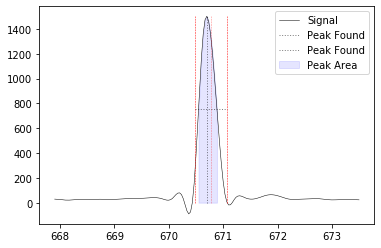

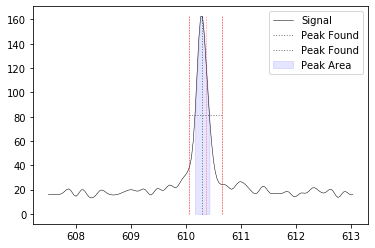

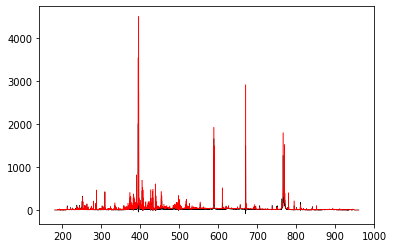

In [36]:
al = element('Li')

Tp = 1.*T_ref
sg = current_experiment.mean_signal

n_spectrometer = 0
ll = sg.wavelengths[n_spectrometer][0]
ul = sg.wavelengths[n_spectrometer][-1]

ion_energies = al.ion_energies

#ion state 1
nlines = 5
l_num, lines = al.get_most_relevant_lines_ion_state(ion_state = 1, electron_temperature=Tp, n_lines = nlines,lower_limit = ll, upper_limit = ul)

j=1
current_experiment = list_of_experiments[j]
#print(current_experiment.list_of_signals)
#print(sample_ids[j])
#stich the wavelengths and spectrum (not the best way, but for now let us have it)
wavelengths = np.concatenate([w for w in current_experiment.mean_signal.wavelengths]) 
spectrum = np.concatenate([s for s in current_experiment.mean_signal.spectrum ])

#get peak area
ritz = lines[0].ritz
subplots()
intensity = get_peak_area(ritz,0.5 , wavelengths, spectrum, 0.3, True)

#get peak area
ritz = lines[2].ritz
subplots()
intensity = get_peak_area(ritz,0.5 , wavelengths, spectrum, 0.3, True)

line_0=lines[0]
line_1=lines[2]




subplots()
plot(wavelengths,spectrum, '-', lw=0.5, color='k')
j=10
current_experiment = list_of_experiments[j]
#stich the wavelengths and spectrum (not the best way, but for now let us have it)
wavelengths = np.concatenate([w for w in current_experiment.mean_signal.wavelengths]) 
spectrum = np.concatenate([s for s in current_experiment.mean_signal.spectrum ])
plot(wavelengths,spectrum, '-', lw=0.5, color='r')




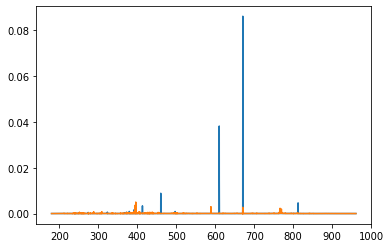

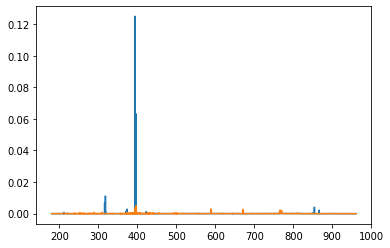

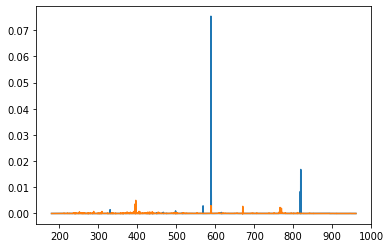

In [38]:
#compare
sample = digital_twin([['Li',1]])
n_spectrometer = 0

ll = sg.wavelengths[n_spectrometer][0]
ul = sg.wavelengths[n_spectrometer][-1]

wl1, intensities, labels, n_ions,specs = sample.spectrum_NIST(max_ion_state=3,wl=sg.wavelengths[n_spectrometer],
                      electron_density = n_e_ref, electron_temperature=T_ref, resolution=3000,
                      normalize = False, Plot = False, Map = False)

specs[0]=specs[0]/(np.sum(specs[0]))
subplots()
plot(wl1[0],specs[0])
j=1
current_experiment = list_of_experiments[j]
wavelengths = current_experiment.mean_signal.wavelengths[0]
spectrum = current_experiment.mean_signal.spectrum[0]
spectrum = spectrum/(np.sum(spectrum))
plot(wavelengths,spectrum)

#compare
sample = digital_twin([['Ca',1]])
n_spectrometer = 0

ll = sg.wavelengths[n_spectrometer][0]
ul = sg.wavelengths[n_spectrometer][-1]

wl1, intensities, labels, n_ions,specs1 = sample.spectrum_NIST(max_ion_state=3,wl=sg.wavelengths[n_spectrometer],
                      electron_density = n_e_ref, electron_temperature=T_ref, resolution=3000,
                      normalize = False, Plot = False, Map = False)

specs1[0]=specs1[0]/(np.sum(specs1[0]))
subplots()
plot(wl1[0],specs1[0])
j=1
current_experiment = list_of_experiments[j]
wavelengths = current_experiment.mean_signal.wavelengths[0]
spectrum = current_experiment.mean_signal.spectrum[0]
spectrum = spectrum/(np.sum(spectrum))
plot(wavelengths,spectrum)


#compare
sample = digital_twin([['Na',1]])
n_spectrometer = 0

ll = sg.wavelengths[n_spectrometer][0]
ul = sg.wavelengths[n_spectrometer][-1]

wl1, intensities, labels, n_ions,specs1 = sample.spectrum_NIST(max_ion_state=3,wl=sg.wavelengths[n_spectrometer],
                      electron_density = n_e_ref, electron_temperature=T_ref, resolution=3000,
                      normalize = False, Plot = False, Map = False)

specs1[0]=specs1[0]/(np.sum(specs1[0]))
subplots()
plot(wl1[0],specs1[0])
j=1
current_experiment = list_of_experiments[j]
wavelengths = current_experiment.mean_signal.wavelengths[0]
spectrum = current_experiment.mean_signal.spectrum[0]
spectrum = spectrum/(np.sum(spectrum))
plot(wavelengths,spectrum)

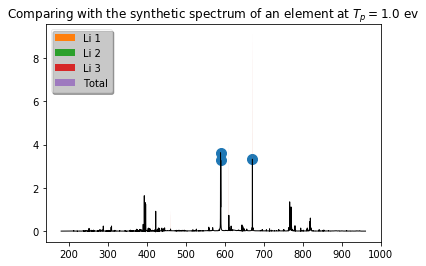

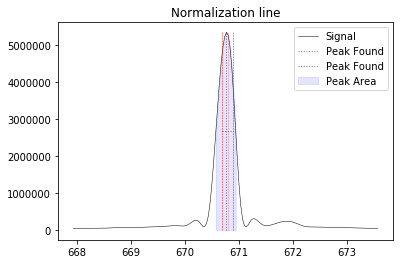

In [40]:
sample = digital_twin([['Li',1]])
n_spectrometer = 0

ll = sg.wavelengths[n_spectrometer][0]
ul = sg.wavelengths[n_spectrometer][-1]

#ion state 1
nlines = 3
l_num, lines = al.get_most_relevant_lines_ion_state(ion_state = 1, electron_temperature=Tp, 
                                                        n_lines = nlines,lower_limit = ll, upper_limit = ul)

#line to normalize the intensity for direct
line_norm1=lines[1]
sg.compare_and_peaks(sample, spectrometer=n_spectrometer,max_ion_state=2, 
                                 electron_temperature = Tp,
                                 d_lambda=0.02, use_wavelengths=True,line_normalize=line_norm1,Plotline = True, resolution = 5000)

# Linear Calibration - Univariate

Line of Wavelength 670.7760000000001

0.3679765047261942


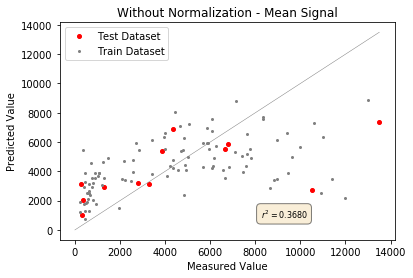

In [41]:
#test size
ts = 0.1
rs=0

def linear_calibration_curve(list_of_experiments, targets, line, ratio_of_maximum = 0.5, radius = 0.3, 
                    test_size=ts,random_seed=rs,
                    Plot=True, Title='Linear Calibration Curve', 
                  label_x='Measured Value', label_y='Predicted Value'):

    intensities=[]

    for j in range(0,len(list_of_experiments)):
        current_experiment = list_of_experiments[j]
        
        #stich the wavelengths and spectrum (not the best way, but for now let us have it)
        wavelengths = np.concatenate([w for w in current_experiment.mean_signal.wavelengths]) 
        spectrum = np.concatenate([s for s in current_experiment.mean_signal.spectrum ])
        spectrum = spectrum/(np.sum(spectrum))
        #get peak area
        ritz = line.ritz
        intensity = get_peak_area(ritz,ratio_of_maximum , wavelengths, spectrum, radius, False)
        intensities.append(intensity)
    
    intensities=array(intensities)
    X_train, X_test, y_train, y_test = train_test_split(intensities.reshape(-1, 1), targets.reshape(-1, 1), 
                                                        test_size=test_size, random_state=random_seed)
    
    UCC_model = linear_model.LinearRegression()
    UCC_model.fit(X_train,y_train)
    r2=UCC_model.score(X_test, y_test) 
    
    if Plot:
        subplots()

        ###With baseline
        #subplot(121)
        title("Without Normalization - Mean Signal")

        ax = gca()
        ax.text(0.6, 0.1,  '$r^2 =$' + "%0.4f" % r2,
                        transform=ax.transAxes,fontsize=8, bbox={'boxstyle':'round', 'facecolor': 'wheat', 'alpha': 0.5, 'pad': 0.5})

        print(r2)
        predicted = UCC_model.predict(X_test)
        predicted_train = UCC_model.predict(X_train)
        plot(y_test,predicted,'o',color = 'r', markersize=4,label = 'Test Dataset')
        plot(y_train,predicted_train,'o',color = 'grey', markersize=2, label = 'Train Dataset')

        mm=max([max(targets),max(predicted)])
        xyline =np.linspace(0,mm,5) 
        plot(xyline,xyline,'-',color = 'grey', lw=0.5)
        xlabel(label_x)
        ylabel(label_y)
        legend()
        
    
    return UCC_model, r2, intensities, targets


line = lines[0]
print(line)
init = 5#5
end = 120#39
UCC_model, r2, intensities, targets0 = linear_calibration_curve(list_of_experiments[init:end], targets[init:end], line, ratio_of_maximum = 0.5, radius = 0.3, 
                    test_size=ts,random_seed=rs,
                    Plot=True, Title='Linear Calibration Curve', 
                  label_x='Measured Value', label_y='Predicted Value')



In [42]:
targets = []
for i in range(0,len(sample_ids)):
    target = concentration_data3.loc[" "+str(sample_ids[i]),'Li']
    targets.append(target)
targets = np.array(targets)


['nan' 'nan' 'nan' 'nan' 'nan' ' SCH' ' SCH' ' SCH' ' SCH' ' SCH'
 ' SCH+FGP' ' SCH+FGP' ' FGP+VQZ' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' SCH+FGP' ' SCH+FGP'
 ' FGP' ' FGP' ' SCH+FGP' ' SCH' ' SCH' ' SCH' ' SCH' ' SCH' ' SCH+FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' SCH+FGP' ' SCH+FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP'
 ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP' ' FGP']


"\nsubplots()\nplot(intensities[:split0],'o',color='r')\nplot(targets0[:split0],'o',color='r')\nplot(intensities[split0:],'o',color='k')\nplot(targets0[split0:],'o',color='k')\nprint(targets[11])\nprint(sample_ids[11])\n"

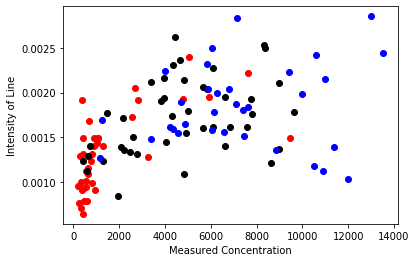

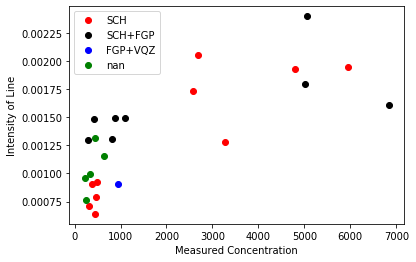

In [43]:
subplots()
split0=39
split1=82
split2=118
plot(targets0[:split0],intensities[:split0],'o',color='r')
plot(targets0[split0:split1],intensities[split0:split1],'o',color='k')
plot(targets0[split1:split2],intensities[split1:split2],'o',color='b')
xlabel("Measured Concentration")
ylabel("Intensity of Line")

chemistry_labels=[]
for i in range(0,len(sample_ids)):
    chemistry_label = concentration_data3.loc[" "+str(sample_ids[i]),'Chemistry']
    chemistry_labels.append(chemistry_label)

chemistry_labels=np.array(chemistry_labels)
print(chemistry_labels)
index1 = where(chemistry_labels == ' SCH')[0]
index2 = where(chemistry_labels == ' SCH+FGP')[0]
index3 = where(chemistry_labels == ' FGP+VQZ')[0]
index4 = where(chemistry_labels == ' FGP')[0]
index5 = where(chemistry_labels == 'nan')[0]

subplots()
try:
    plot(targets0[index1],intensities[index1],'o',color='r',label='SCH')
except:
    None
try:
    plot(targets0[index2],intensities[index2],'o',color='k',label = 'SCH+FGP')
except:
    None
try:
    plot(targets0[index3],intensities[index3],'o',color='b',label='FGP+VQZ')
except:
    None
try:
    plot(targets0[index4],intensities[index4],'o',color='y',label='FGP')
except:
    None
try:
    plot(targets0[index5],intensities[index5],'o',color='g',label='nan')
except:
    None
    
xlabel("Measured Concentration")
ylabel("Intensity of Line")
legend()


"""
subplots()
plot(intensities[:split0],'o',color='r')
plot(targets0[:split0],'o',color='r')
plot(intensities[split0:],'o',color='k')
plot(targets0[split0:],'o',color='k')
print(targets[11])
print(sample_ids[11])
"""

# Linear Calibration model - multivariate

0.1569666945695869
0.30553142208917883


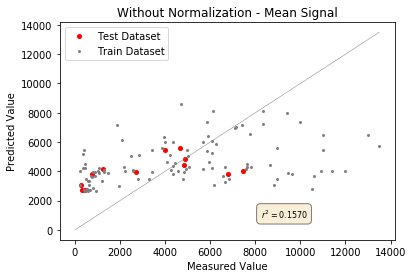

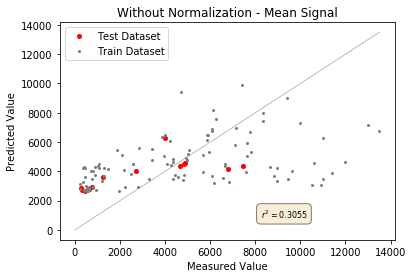

In [44]:

def linear_calibration_curve_multilines(list_of_experiments, targets, lines, ratio_of_maximum = 0.5, radius = 0.3, 
                    test_size=ts,random_seed=rs,
                    Plot=True, Title='Linear Calibration Curve', 
                  label_x='Measured Value', label_y='Predicted Value'):

    
    intensities=[]
    for i in range(len(lines)):
        temp_intensities=[]
        line=lines[i]
        
        for j in range(0,len(list_of_experiments)):
            current_experiment = list_of_experiments[j]

            #stich the wavelengths and spectrum (not the best way, but for now let us have it)
            wavelengths = np.concatenate([w for w in current_experiment.mean_signal.wavelengths]) 
            spectrum = np.concatenate([s for s in current_experiment.mean_signal.spectrum ])

            #get peak area
            ritz = line.ritz
            intensity = get_peak_area(ritz,ratio_of_maximum , wavelengths, spectrum, radius, False)
            temp_intensities.append(intensity)

        temp_intensities=np.array(temp_intensities)
        intensities.append(np.array(temp_intensities))
    intensities=np.array(intensities)
        
    X_train, X_test, y_train, y_test = train_test_split(np.transpose(intensities), targets.reshape(-1, 1), 
                                                            test_size=test_size, random_state=random_seed)
    
    UCC_model = linear_model.LinearRegression()
    UCC_model.fit(X_train,y_train)
    r2=UCC_model.score(X_test, y_test) 
    
    if Plot:
        subplots()

        ###With baseline
        #subplot(121)
        title("Without Normalization - Mean Signal")

        ax = gca()
        ax.text(0.6, 0.1,  '$r^2 =$' + "%0.4f" % r2,
                        transform=ax.transAxes,fontsize=8, bbox={'boxstyle':'round', 'facecolor': 'wheat', 'alpha': 0.5, 'pad': 0.5})

        print(r2)
        predicted = UCC_model.predict(X_test)
        predicted_train = UCC_model.predict(X_train)
        plot(y_test,predicted,'o',color = 'r', markersize=4,label = 'Test Dataset')
        plot(y_train,predicted_train,'o',color = 'grey', markersize=2, label = 'Train Dataset')

        mm=max([max(targets),max(predicted)])
        xyline =np.linspace(0,mm,5) 
        plot(xyline,xyline,'-',color = 'grey', lw=0.5)
        xlabel(label_x)
        ylabel(label_y)
        legend()
        
    
    return UCC_model, r2, intensities, targets


line = lines[0]
init = 5
UCC_model, r2, intensities, targets0 = linear_calibration_curve_multilines(list_of_experiments[init:], targets[init:], 
                    [line_0], ratio_of_maximum = 0.5, radius = 0.3, 
                    test_size=ts,random_seed=rs,
                    Plot=True, Title='Linear Calibration Curve', 
                  label_x='Measured Value', label_y='Predicted Value')

UCC_model, r2, intensities, targets0 = linear_calibration_curve_multilines(list_of_experiments[init:], targets[init:], 
                    [line_0,line_1], ratio_of_maximum = 0.5, radius = 0.3, 
                    test_size=ts,random_seed=rs,
                    Plot=True, Title='Linear Calibration Curve', 
                  label_x='Measured Value', label_y='Predicted Value')

